# Introduction to 2D plots

This notebook demonstrates how plot some latitude by longitude maps of some key surface variables. Most features are available in the preinstalled `geog0111` environment. 

But updated plotting that removes white meridional lines around the Greenwich Meridian, requires the `geog0121-2022` virtual environment. Instructions about how to install this environment (using `conda` and the `environment.yml` file) are provided in the handbook.

### Import packages and define fucntions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray
import numpy
import cartopy
import matplotlib
%matplotlib inline

# Add a couple of deep down individual functions.
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import AutoMinorLocator
from cartopy.util import add_cyclic_point

# used to create area averages over AR6 regions.
import regionmask

# hide some warning messages
import warnings
warnings.filterwarnings("ignore")


# UKESM's El Niño temperature pattern
Here we use the CVDP output files to plot the temperature response to an El Niño. First we will load in the data

In [2]:
#On the JuypterHub (see at the bottom for alternate file locations)
filename='~/Documents/geog0121/data/UKESM1_summary_files/UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc'

In [3]:
# load files
expt_file=xarray.open_dataset(filename,decode_times=False)
# load the coordinates
lat=expt_file['lat']
lon=expt_file['lon']
# load the variables themselves
enso_pattern=expt_file.nino34_spacomp_tas_djf1

Then we will specify the colorscale and map

In [4]:
#temperatures
cmap=matplotlib.pyplot.get_cmap('bwr') #define colormap

#define colormap's range and scale
cmap_limits=[-5,5]
bounds = numpy.linspace(cmap_limits[0], cmap_limits[1], 21)
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Now we will make a global plot of the El Niño pattern

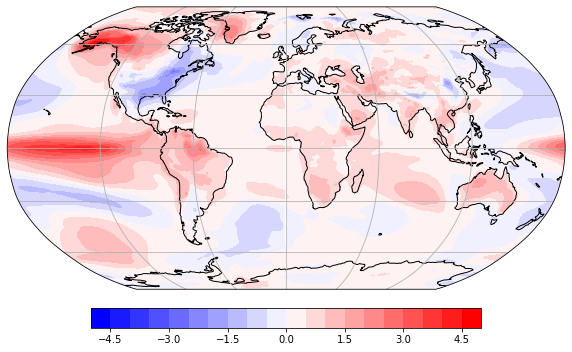

In [5]:
# Choose the map and projection
projection = cartopy.crs.Robinson()
transform=cartopy.crs.PlateCarree()

# Plot the axes
matplotlib.pyplot.figure(figsize=(10,7))
ax = matplotlib.pyplot.axes(projection=projection)
ax.coastlines()
ax.gridlines()

# Make the actual figure
fig=ax.contourf(lon,lat,enso_pattern,levels=bounds, transform=transform,cmap=cmap,norm=norm)

# Alter the color bar for the map
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
matplotlib.pyplot.colorbar(fig,cax=cax,**kw)


And then lets zoom into a smaller region of it

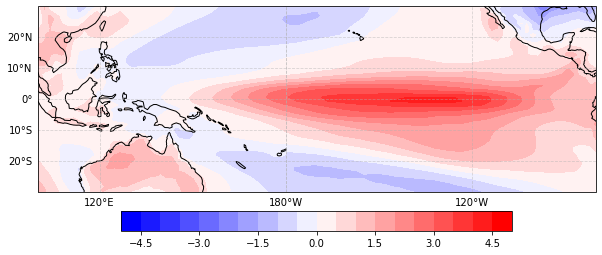

In [6]:
#Regional map
region=[100,280,-30,30] #[lon_min,lon_max,lat_min,lat_max]

# note the specification of the central longitude, so that is spans the dateline
projection = cartopy.crs.PlateCarree(central_longitude=180., globe=None)
transform=cartopy.crs.PlateCarree()

matplotlib.pyplot.figure(figsize=(10,7))
ax = matplotlib.pyplot.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.top_labels = False
gl.xformatter = LONGITUDE_FORMATTER

fig=ax.contourf(lon,lat,enso_pattern,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, cartopy.crs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
matplotlib.pyplot.colorbar(fig,cax=cax,**kw)

#matplotlib.pyplot.savefig(figname)

# Seasonal precipitation anomalies

The CVDP files can be used to create maps of the changes in seasonal precipitation. First we select the variable

In [7]:
#Set some variables to decide what to plot
end_period='2071-2100'
start_period='1851-1900'
ssp='ssp585'

filename_a='~/geog0121_shared_space/UKESM1_summary_files/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,end_period)
filename_b='~/geog0121_shared_space/UKESM1_summary_files/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,start_period)

In [8]:
# load files
expt_a_file=xarray.open_dataset(filename_a,decode_times=False)
expt_b_file=xarray.open_dataset(filename_b,decode_times=False)

In [9]:
#seasonal precipitation anomalies
variable_name='pr_spatialmean_djf'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b

Then we define the colormap, and give it a non-linear interval

In [10]:
#precipitations
cmap=matplotlib.pyplot.get_cmap('BrBG') #define colormap

#define colormap's range and scale
bounds = [-5,-2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,2,5]
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Then we can create a global map with...

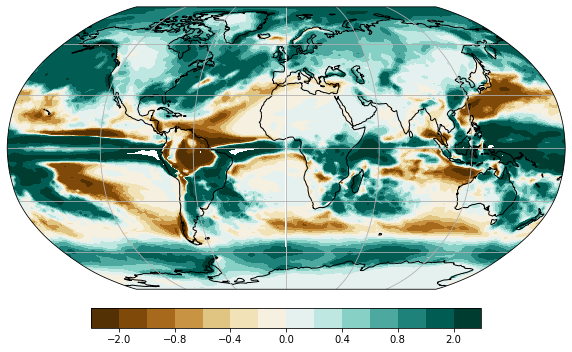

In [11]:
#Global map

projection = cartopy.crs.Robinson()
transform=cartopy.crs.PlateCarree()

matplotlib.pyplot.figure(figsize=(10,7))
ax = matplotlib.pyplot.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
matplotlib.pyplot.colorbar(fig,cax=cax,**kw)

Or a regional map with...

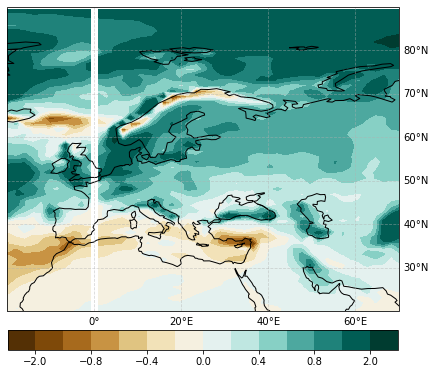

In [12]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = cartopy.crs.PlateCarree(central_longitude=0.0, globe=None)
transform=cartopy.crs.PlateCarree()

matplotlib.pyplot.figure(figsize=(10,7))
ax = matplotlib.pyplot.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, cartopy.crs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
matplotlib.pyplot.colorbar(fig,cax=cax,**kw)



If your regional plot (like this one) happens to cross the Greenwich meridian, then you will end up with a white line going straight up the middle of your regional plot. This can be fixed by adding a "cyclic point" to loop the data around the globe. To understand this, think about how you need to overlap the wrapping paper on a present to cover it completely. 

There is a function in python to do this, but unfortunately it doesn't come in the standard version of python. This function is in the cell below.

You will need to make your own virtual environment called `geog0121-2022` using conda and the yml file provided. If you have not down this, then when you run the code below it will fail with the following error message... 
> TypeError: invalid indexer array

In [13]:
diff, lon = add_cyclic_point(diff, coord=lon)

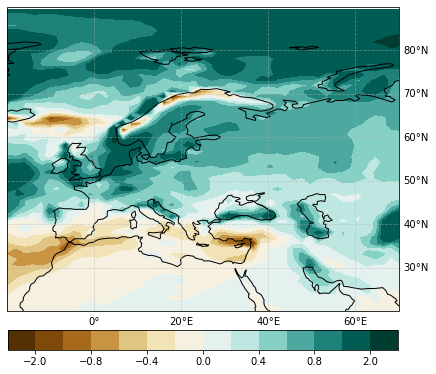

In [14]:
matplotlib.pyplot.figure(figsize=(10,7))
ax = matplotlib.pyplot.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, cartopy.crs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
matplotlib.pyplot.colorbar(fig,cax=cax,**kw)

# Sea ice
Sea ice is stored on the Ocean Grid - which makes plotting it a bit more tricky

In [15]:
filename_4ice='~/geog0121_shared_space/UKESM1_summary_files/UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc'

In [16]:
#Load the data
variable_name='sic_nh_spatialmean_ann'

expt_a_file=xarray.open_dataset(filename_4ice,decode_times=False)
expt_a=expt_a_file[variable_name]

expt_a

<xarray.DataArray 'sic_nh_spatialmean_ann' (j: 330, i: 360)>
[118800 values with dtype=float32]
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 321 322 323 324 325 326 327 328 329
Attributes:
    coordinates:     type latitude longitude
    history:         2019-04-05T15:48:59Z altered by CMOR: Converted units fr...
    original_units:  1
    original_name:   mo: (variable_name: aice)
    units:           %
    comment:         Area fraction of grid cell covered by sea ice
    long_name:       Northern Hemisphere sic mean (annual)
    standard_name:   sea_ice_area_fraction

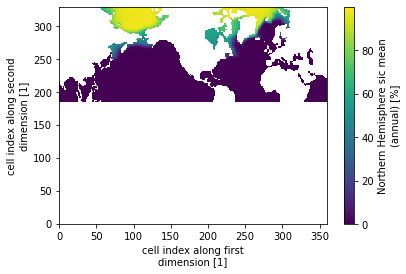

In [17]:
expt_a.plot()

In [18]:
# coordinates
lon2d=expt_a_file['lon2d_ice_nh']
lat2d=expt_a_file['lat2d_ice_nh']

The default plot of this variable above demonstrates both the odd grid, and the fact that we only have data in the northern hemisphere. In fact the latitudes and longitudes of each grid point are shown in the figures below

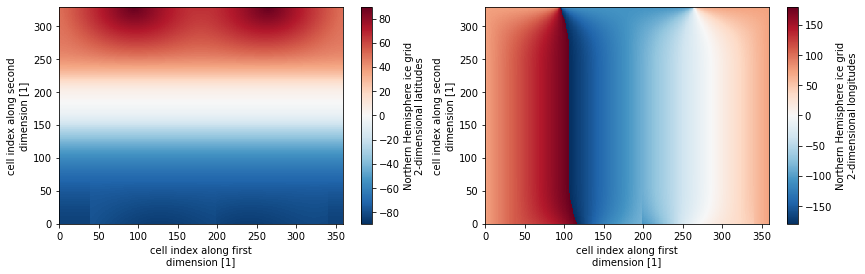

In [19]:
fig, (ax1, ax2) = matplotlib.pyplot.subplots(ncols=2, figsize=(14,4))
lat2d.plot(ax=ax1)
lon2d.plot(ax=ax2)

In [20]:
#remove all 0 
ice=expt_a.where(expt_a>0)

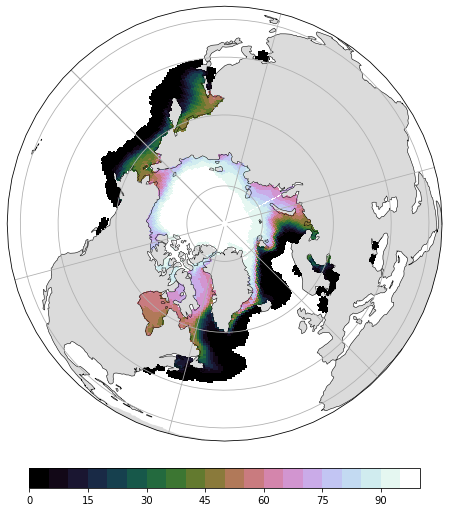

In [21]:
cmap=matplotlib.pyplot.get_cmap('cubehelix')
projection = cartopy.crs.PlateCarree(central_longitude=0.0, globe=None)

transform=cartopy.crs.PlateCarree()

bounds = numpy.linspace(0, 100, 21)
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)



matplotlib.pyplot.figure(figsize=(10, 10))
ax = matplotlib.pyplot.axes(projection=cartopy.crs.Orthographic(central_latitude=90.0,central_longitude=-45.))
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()

fig=ax.pcolormesh(lon2d,lat2d,ice, transform=transform,cmap=cmap,norm=norm)

#add bounday of expt_b
#ax.contour(lon_nh,lat_nh,expt_b, colors='black', levels=[1], linewidth=4, transform=transform)

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)

matplotlib.pyplot.colorbar(fig,cax=cax,**kw)

# Alternate File Locations

In [ ]:
#FOR YOUR OWN LAPTOP
import os
import urllib

# El Nino
directory='Data' 
filename='%s/UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc'%(directory)
if not os.path.isfile(filename):
    print('Downloading %s' %(filename))
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc", filename)    


# Rainfall pattern changes
end_period='2071-2100'
start_period='1851-1900'
ssp='ssp585'
filename_a='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,end_period)
filename_b='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,start_period)
if not os.path.isfile(filename_a):
    print('Downloading %s' %(filename_a))
    !mkdir Data
    url_a='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,end_period)
    urllib.request.urlretrieve(url_a, filename_a)    
    
if not os.path.isfile(filename_b):
    print('Downloading %s' %(filename_b))
    url_b='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(ssp,start_period)
    urllib.request.urlretrieve(url_b, filename_b)
    
# sea ice
filename_4ice='UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc'
if not os.path.isfile(filename_4ice):
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_historical_1981-2010.cvdp_data.1850-2014.nc", filename_4ice)